In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Load the dataset
loan_records = pd.read_csv("loan_prediction_dataset.csv")
loan_records.head()

,Age,Income,Credit_Score,Loan_Amount,Loan_Term,Employment_Status,Loan_Approved
0,56,81788,334,15022,48,Employed,0
1,69,102879,781,21013,24,Self-Employed,1
2,46,58827,779,39687,60,Self-Employed,0
3,32,127188,364,16886,24,Unemployed,0
4,60,25655,307,26256,36,Unemployed,0


In [2]:
# Step 2: Clean column headers
loan_records.columns = loan_records.columns.str.strip()

# Step 3: Encode 'Employment_Status' using LabelEncoder
status_encoder = LabelEncoder()
loan_records['Employment_Status'] = status_encoder.fit_transform(loan_records['Employment_Status'])

In [3]:
# Step 4: Check and report missing values
missing_data = loan_records.isnull().sum()
print("Missing Values in Each Column:\n", missing_data)


Missing Values in Each Column:
 Age                  0
Income               0
Credit_Score         0
Loan_Amount          0
Loan_Term            0
Employment_Status    0
Loan_Approved        0
dtype: int64


In [4]:
# Step 5: Separate features and label
predictors = loan_records.drop(columns=['Loan_Approved'])
approval_outcome = loan_records['Loan_Approved']


In [5]:
# Step 6: Normalize input features
feature_scaler = StandardScaler()
normalized_features = feature_scaler.fit_transform(predictors)

In [6]:
# Step 7: Split into train and test sets
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    normalized_features, approval_outcome, test_size=0.2, random_state=42)

# Final check
print("Training Set Shape :", X_train_split.shape)
print("Testing Set Shape  :", X_test_split.shape)

Training Set Shape : (1600, 6)
Testing Set Shape  : (400, 6)


# EXPLORATORY DATA ANALYSIS

<ipython-input-7-0fab49539635>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Loan_Approved', data=loan_records, palette='Set2')


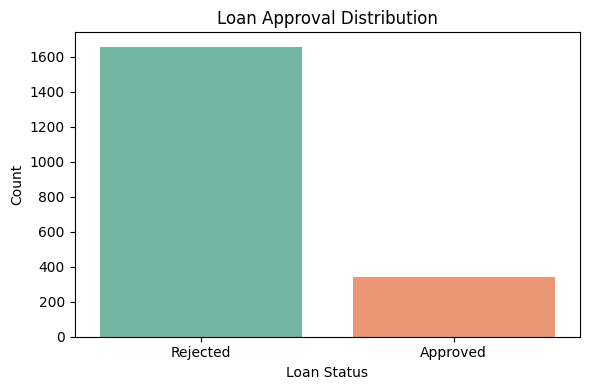

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Approved', data=loan_records, palette='Set2')
plt.title("Loan Approval Distribution")
plt.xticks([0, 1], ['Rejected', 'Approved'])
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


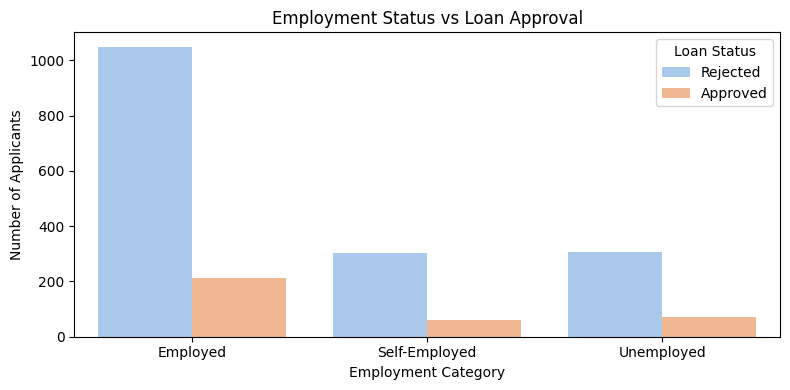

In [8]:
# employment labels
eda_data = loan_records.copy()
employment_labels = {0: "Employed", 1: "Self-Employed", 2: "Unemployed"}
eda_data['Employment_Status'] = eda_data['Employment_Status'].map(employment_labels)

plt.figure(figsize=(8, 4))
sns.countplot(x='Employment_Status', hue='Loan_Approved', data=eda_data, palette='pastel')
plt.title("Employment Status vs Loan Approval")
plt.xlabel("Employment Category")
plt.ylabel("Number of Applicants")
plt.legend(title="Loan Status", labels=["Rejected", "Approved"])
plt.tight_layout()
plt.show()


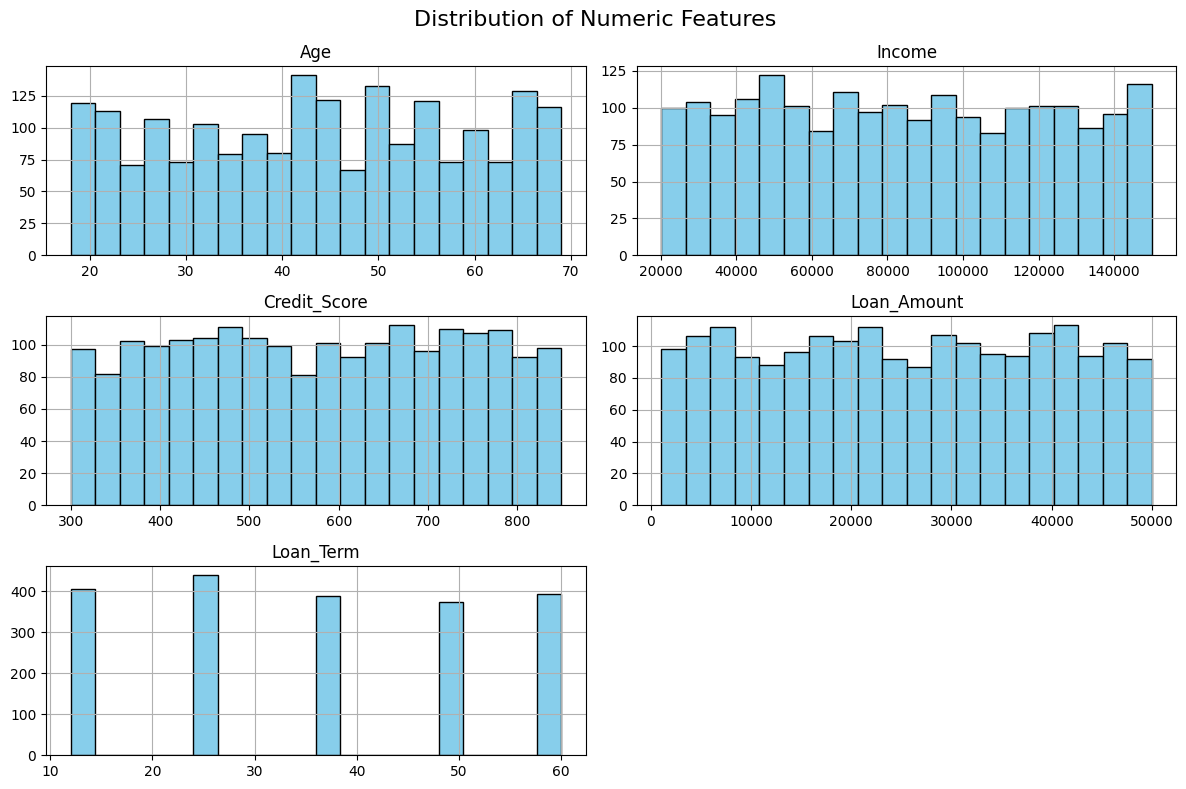

In [9]:
# Visualize distributions of numerical fields
numerical_fields = ['Age', 'Income', 'Credit_Score', 'Loan_Amount', 'Loan_Term']
loan_records[numerical_fields].hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()


<ipython-input-10-cbf129f5c216>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Approved', y='Credit_Score', data=loan_records, palette='coolwarm')


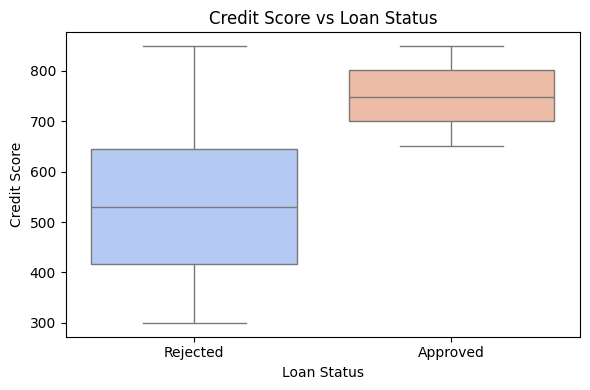

In [10]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Loan_Approved', y='Credit_Score', data=loan_records, palette='coolwarm')
plt.title("Credit Score vs Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Credit Score")
plt.xticks([0, 1], ['Rejected', 'Approved'])
plt.tight_layout()
plt.show()


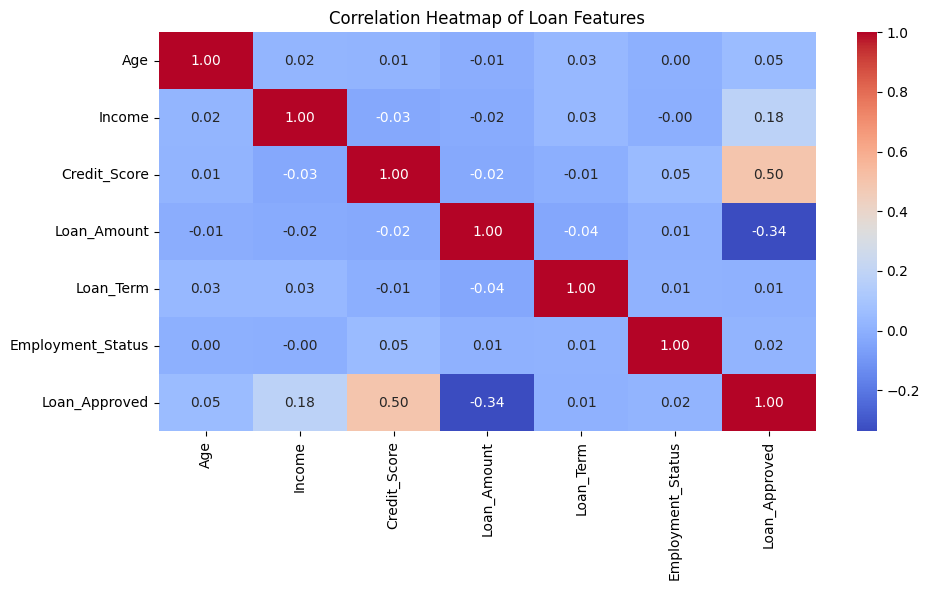

In [11]:
# Compute and visualize correlations
plt.figure(figsize=(10, 6))
correlation_map = loan_records.corr(numeric_only=True)
sns.heatmap(correlation_map, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Loan Features")
plt.tight_layout()
plt.show()
